# Importowanie bibliotek
- *subprocess* - uruchamianie programów zewnętrznych w skrypcie, uzyskiwanie z nich danych
- *numpy* - obliczenia macierzowe, działania na macierzach
- *matplotlib.pyplot* - biblioteka do rysowania wykresów w stylu MatLab'a

In [62]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import custom_statistics as stat
import custom_approx as approx

# Uzyskiwanie wyników pomiaru z programu

In [63]:
X = np.linspace(1, 391, 20)
U = np.zeros(X.size)

for i, val in enumerate(X):
	program_output = subprocess.run(["z09v01.exe", str(val)], capture_output=True, text=True)
	U[i] = program_output.stdout


In [64]:
# plt.plot(x, t, 'ro')

# Standaryzacja pomiarów do przedziału <-1; 1>
W kolejności obliczamy wartość średnią i jednostkę zmienności:
$$\bar{x}=\frac{x_{i,min} + x_{i,max}}{2}$$
$$\varDelta x=\frac{x_{i,max} + x_{i.min}}{2}$$
Następnie przeliczamy wartości $x_i$ do nowego ukladu współrzędnych:
$$t_i = \frac{x_i - \bar{x}}{\varDelta x}$$
gdzie $i = 1,2,...,N$

In [65]:
average_x = (X[0] + X[-1]) / (2)
delta_x   = (X[-1]+ X[0] ) / (2)

T = [(x - average_x)/delta_x for x in X]

# Aproksymacja danych z użyciem wielomianów

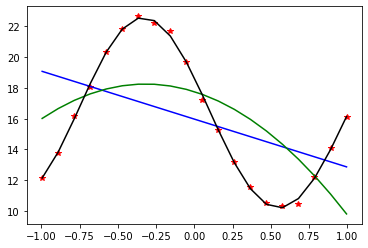

In [66]:
first_deg = approx.polynomial_approximation(T, U, 2)
second_deg = approx.polynomial_approximation(T, U, 3)
third_deg = approx.polynomial_approximation(T, U, 8)

plt.plot(T, U, 'r*', T, first_deg, 'b-', T, second_deg, 'g-', T, third_deg, 'k-')

# Aproksymacja danych z użyciem logarytmu naturalnego

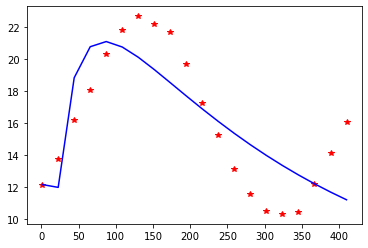

In [67]:
nat_approx = approx.natlog_approximation(X, U, 5)
plt.plot(X, U, 'r*', X, nat_approx, 'b-')

# Aproksymacja danych z użyciem funkcji $\frac{1}{x}$

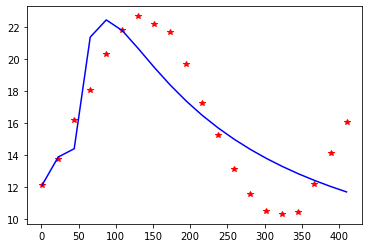

In [68]:
plt.plot(X, U, 'r*', X, approx.rational_approximation(X, U, 5), 'b-')

# Aproksymacja trygonometryczna

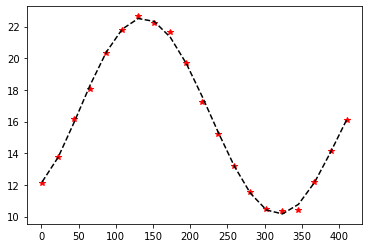

In [69]:
trig_approx = approx.trig_approximation(X, U, 4, 0.001*np.pi)
plt.plot(X, U, 'r*', X, trig_approx, 'k--')


In [70]:
print(approx.av_rel_error(U, trig_approx))
print(approx.av_rel_error(U, third_deg))
print(approx.av_rel_error(U, nat_approx))
print(approx.av_abs_error(U, trig_approx))
print(approx.av_abs_error(U, third_deg))
print(approx.av_abs_error(U, nat_approx))

0.008392183258007961
0.008012543922377163
0.13951529390797252
0.12663828981913258
0.1195453518406974
2.1058301946622975


In [71]:
print(approx.rmse(U, trig_approx))
print(approx.rmse(U, third_deg))
print(approx.rmse(U, nat_approx))
print(approx.determination_coeff(U, trig_approx))
print(approx.determination_coeff(U, third_deg))
print(approx.determination_coeff(U, nat_approx))

0.16590661051161076
0.16014078615785748
2.4382067947161157
0.9984062770257955
0.9985151268161385
0.6557875882973774
